In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

temp_df = pd.read_csv('pubmed_NAc_top1000_jan6.csv')


In [3]:
temp_df.head(20)

,Unnamed: 0,pmid,author,year,title,journal,citedByNof1000
0,342,23177963.0,Britt,2013,Synaptic and behavioral profile of multiple gl...,Neuron,54.0
1,79,20947769.0,Lobo,2010,Cell type-specific loss of BDNF signaling mimi...,"Science (New York, N.Y.)",47.0
2,691,19675534.0,Sesack,2010,Cortico-Basal Ganglia reward network: microcir...,Neuropsychopharmacology : official publication...,44.0
3,366,18500330.0,Conrad,2008,Formation of accumbens GluR2-lacking AMPA rece...,Nature,44.0
4,6,25251489.0,Floresco,2015,The nucleus accumbens: an interface between co...,Annual review of psychology,42.0
5,40,6999537.0,Mogenson,1980,From motivation to action: functional interfac...,Progress in neurobiology,36.0
6,671,19710631.0,Koob,2010,Neurocircuitry of addiction.,Neuropsychopharmacology : official publication...,34.0
7,373,16776597.0,Hyman,2006,Neural mechanisms of addiction: the role of re...,Annual review of neuroscience,32.0
8,1226,16055761.0,Kalivas,2005,The neural basis of addiction: a pathology of ...,The American journal of psychiatry,31.0
9,654,21338877.0,Lüscher,2011,Drug-evoked synaptic plasticity in addiction: ...,Neuron,30.0


16418.0


Text(0.5, 0, 'Publication year of cited paper')

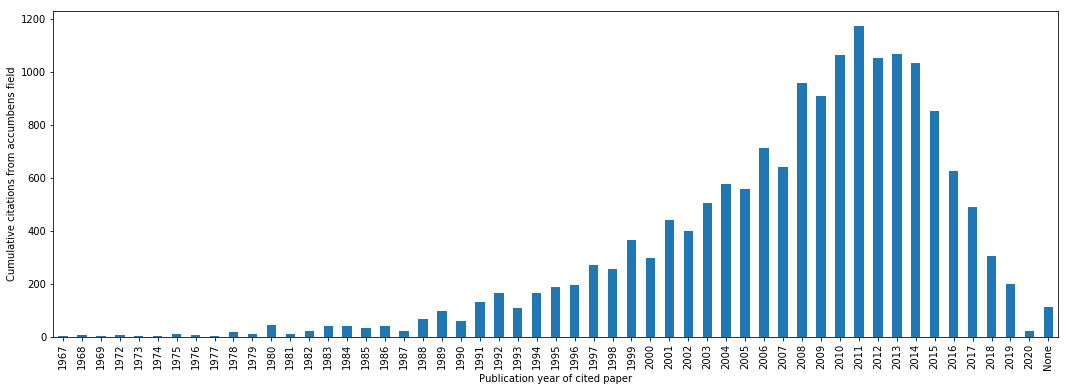

In [4]:
# find which year had the most highly cited papers
print(temp_df['citedByNof1000'].sum())
plt.figure(figsize=(18, 6))
(temp_df.groupby(['year'], as_index=False).sum()
            .groupby('year')['citedByNof1000'].sum()).plot.bar()
plt.ylabel('Cumulative citations from accumbens field')
plt.xlabel('Publication year of cited paper')

In [5]:
# find how often certain authors or journals are included in top cited dataframe
print(temp_df['author'][temp_df['author']=='Phillips'])

print(sum(temp_df['journal']=='Neuron'))     # number of papers in top 2000 that are published in Neuron journal

print(sum(temp_df['citedByNof1000'][temp_df['journal']=='Neuron']))

88      Phillips
545     Phillips
769     Phillips
1495    Phillips
3513    Phillips
3999    Phillips
Name: author, dtype: object
192
950.0


In [6]:
# plot the most highly cited journals on this topic

abc = (temp_df.groupby(['journal'], as_index=False).sum()
            .groupby('journal')['citedByNof1000'].sum())

abc = abc[abc > 200]

abc

journal
Behavioural brain research                                                                            211.0
Biological psychiatry                                                                                 474.0
Brain research                                                                                        332.0
Nature                                                                                                503.0
Nature neuroscience                                                                                   796.0
Neuron                                                                                                950.0
Neuropharmacology                                                                                     379.0
Neuropsychopharmacology : official publication of the American College of Neuropsychopharmacology     718.0
Neuroscience                                                                                          615.0
PloS one            

In [7]:
# plot the journals that have the highest citations on the topic per article

journal_cnts = (temp_df.groupby(['journal'], as_index=False).count()
            .groupby('journal')['citedByNof1000'].sum())

journal_cnts = journal_cnts[journal_cnts > 40]

print(journal_cnts)

journal
Addiction biology                                                                                     50
Alcoholism, clinical and experimental research                                                        52
Behavioural brain research                                                                            67
Biological psychiatry                                                                                123
Brain research                                                                                       105
European journal of pharmacology                                                                      41
Journal of neurochemistry                                                                             62
Journal of neurophysiology                                                                            48
Nature                                                                                                90
Nature neuroscience                            

In [8]:
journal_cites = (temp_df.groupby(['journal'], as_index=False).sum()
            .groupby('journal')['citedByNof1000'].sum())

cites_per_paper = journal_cites/journal_cnts

cites_per_paper = cites_per_paper[cites_per_paper>4]

print(cites_per_paper)

journal
Nature                                                                                5.588889
Nature neuroscience                                                                   5.489655
Nature reviews. Neuroscience                                                          4.500000
Neuron                                                                                4.947917
Proceedings of the National Academy of Sciences of the United States of America       4.160000
Science (New York, N.Y.)                                                              4.890244
The Journal of neuroscience : the official journal of the Society for Neuroscience    4.380531
Trends in neurosciences                                                               4.927273
Name: citedByNof1000, dtype: float64


In [9]:
# find the most impactful (citations/paper) journal per year



Text(0.5, 0, 'Year of publication')

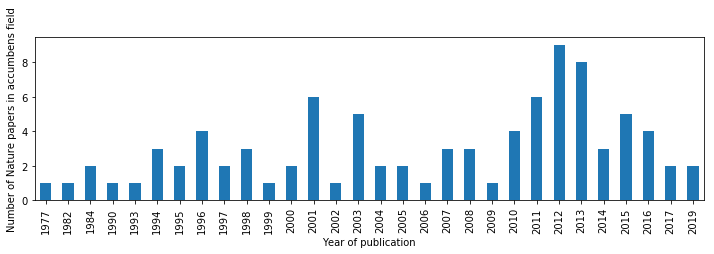

In [10]:
# how many Nature papers in the dopamine fields are published per year?

jour = 'Nature'
nature_df = temp_df.copy()
nature_df = nature_df[nature_df['journal'] == jour]

plt.figure(figsize=(12, 3))
(nature_df.groupby(['year'], as_index=False).count()
            .groupby('year')['citedByNof1000'].sum()).plot.bar()

plt.ylabel('Number of {journa} papers in accumbens field'.format(journa=jour))
plt.xlabel('Year of publication')